###          Exploratory Data Analysis

### 1.Analysis
> 1.Univariate Analysis
> 
> 2.Multivariate Analysis

### 2. Feature Engineering
> 1.Creating new columns
> 
> 2.Modifying existing ones

### 3.Handling Outliers
> 1.Detect Outliers
> 
> 2.Remove Outliers

### Import Libraries

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [103]:
# Importing the dataset
df=pd.read_csv('Titanic-Dataset.csv')

In [104]:
# Shape
df.shape

(891, 12)

In [105]:
# Previewing the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
# Listing down the columns
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

### Categorical Columns
- Survived
- PClass
- Sex
- SibSp
- Parch
- Embarked

### Numerical Columns
- Age
- Fare
- PassengerId

### Mixed Columns
- Name
- Ticket
- Cabin

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [108]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [109]:
# Few Conclusions

# 1. Missing values in Age , Cabin and Embarked columns
#2. More than 70 percent values are missing in cabin columns , will have to drop
#3. Few columns have inappropriate data types

In [110]:
# Dropping cabin column

df.drop(columns=['Cabin'],inplace=True,errors='ignore')

In [111]:
# Imputuing missing values for age
# Strategy - mean

df['Age'].fillna(df['Age'].mean(), inplace=True)

In [112]:


# Imputing missing values for embarked

# finding the most appeared value in embarked column 

df['Embarked'].value_counts

# S it is

df['Embarked'].fillna('S', inplace=True)

In [113]:
# Want to check one more thing ...

# Should I change the SibSp and ParCh to categories

df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [114]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

### Changing data type for the following cols
- Survived(category)
- PClass(category)
- Sex(category)
- Age(int)
- Embarked(category)

In [115]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.8+ KB


In [117]:
# Five points summary
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


Out of 891 62 % people died in the incident


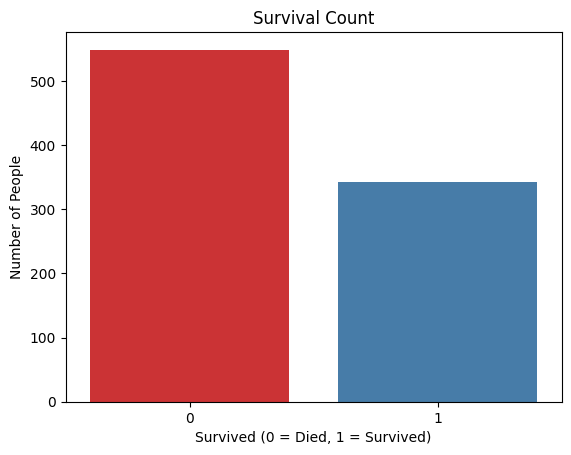

In [118]:
# Univariate Analysis

# Lets start with the Survived col

sns.countplot(x='Survived', data=df, palette='Set1')
plt.title('Survival Count')
plt.xlabel('Survived (0 = Died, 1 = Survived)')
plt.ylabel('Number of People')


death_percent=round((df['Survived'].value_counts().values[0]/891)*100)

print("Out of 891 {} % people died in the incident".format(death_percent))

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


Text(0, 0.5, 'Number of Passengers')

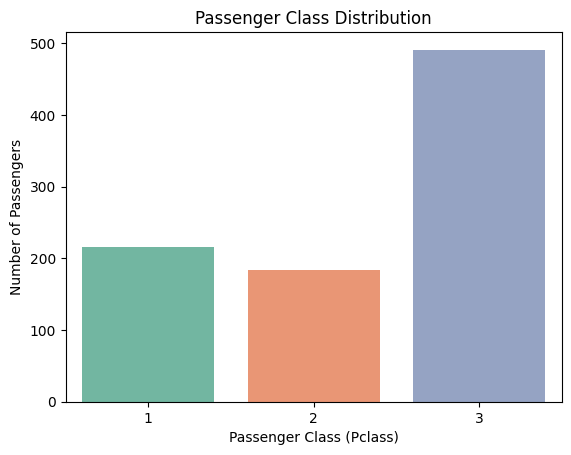

In [119]:
# Pclass column

print((df['Pclass'].value_counts()/891)*100)

sns.countplot(x='Pclass', data=df,palette='Set2')
plt.title('Passenger Class Distribution')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Number of Passengers')

# Conclusion : Pclass was the most crowded class

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


Text(0, 0.5, 'Number of Passengers')

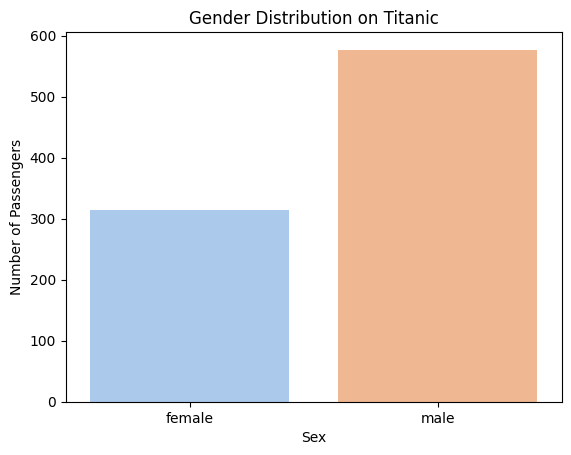

In [120]:
print((df['Sex'].value_counts()/891)*100)

sns.countplot(x='Sex',data=df,palette='pastel')
plt.title('Gender Distribution on Titanic')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


Text(0, 0.5, 'Number of Passengers')

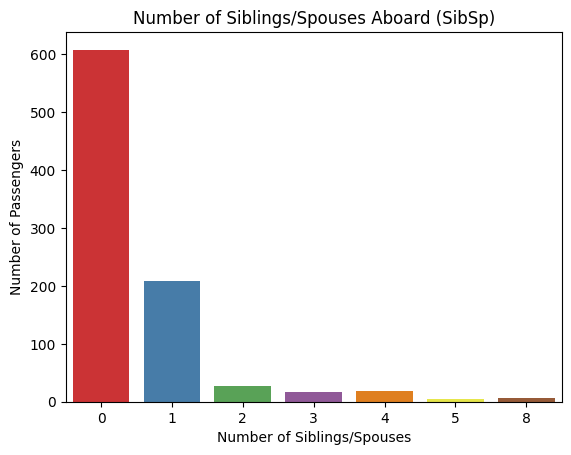

In [121]:
print(df['SibSp'].value_counts())

sns.countplot(x='SibSp', data=df,palette='Set1')
plt.title('Number of Siblings/Spouses Aboard (SibSp)')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Number of Passengers')

Parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: count, dtype: float64


Text(0, 0.5, 'Number of Passengers')

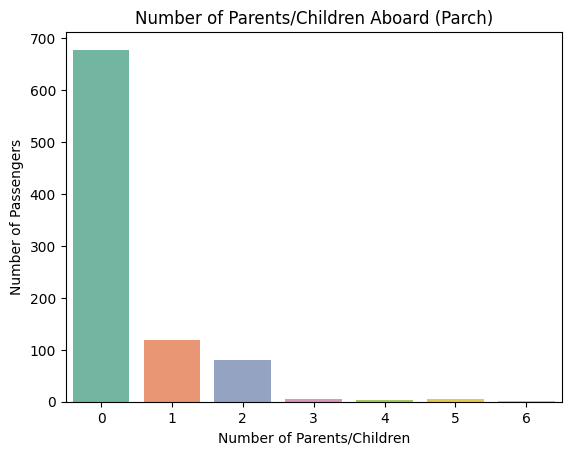

In [122]:
print((df['Parch'].value_counts()/891)*100)

sns.countplot(x='Parch',data=df,palette='Set2')
plt.title('Number of Parents/Children Aboard (Parch)')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Number of Passengers')

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64


Text(0, 0.5, 'Number of Passengers')

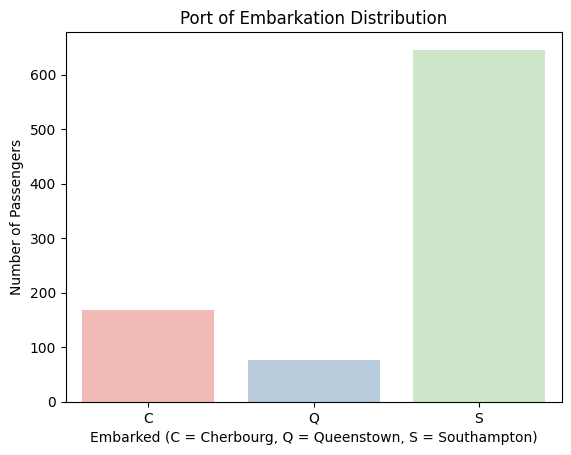

In [123]:
print((df['Embarked'].value_counts()/891)*100)

sns.countplot(x='Embarked',data=df,palette='Pastel1')
plt.title('Port of Embarkation Distribution')
plt.xlabel('Embarked (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Number of Passengers')

0.45956263424701577
0.9865867453652877


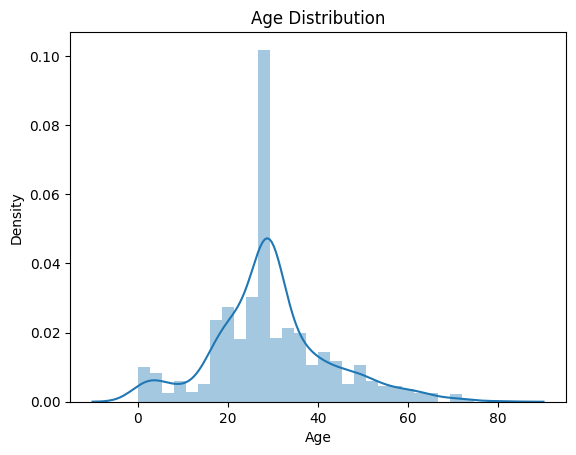

In [124]:
# Age column


sns.distplot(df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')

print(df['Age'].skew())

print(df['Age'].kurt())

Text(0.5, 1.0, 'Boxplot of Age')

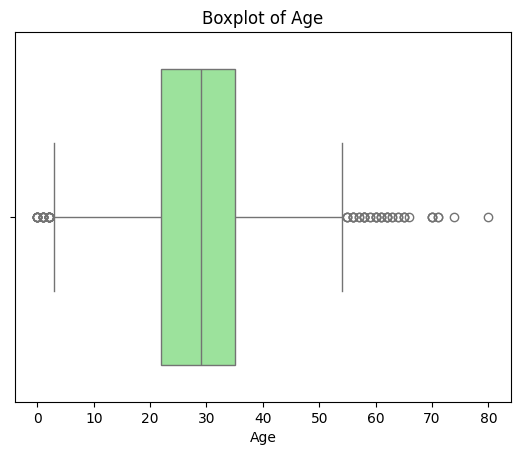

In [125]:
sns.boxplot(x='Age',data=df,color='lightgreen')
plt.title('Boxplot of Age')

## Conclusion
- for all practical purpose age can be considered as normal distribution 
- Deeper analysis is required for outlier detection

Text(0, 0.5, 'Density')

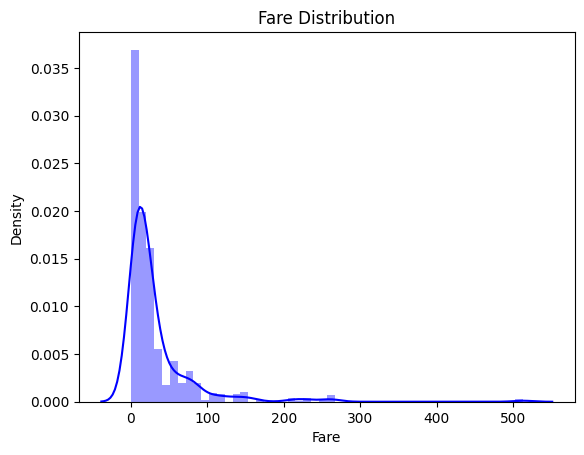

In [126]:
# Fare column

sns.distplot(df['Fare'],color='blue')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Density')

In [127]:
print(df['Fare'].skew())
print(df['Fare'].kurt())

4.787316519674893
33.39814088089868


Text(0.5, 0, 'Fare')

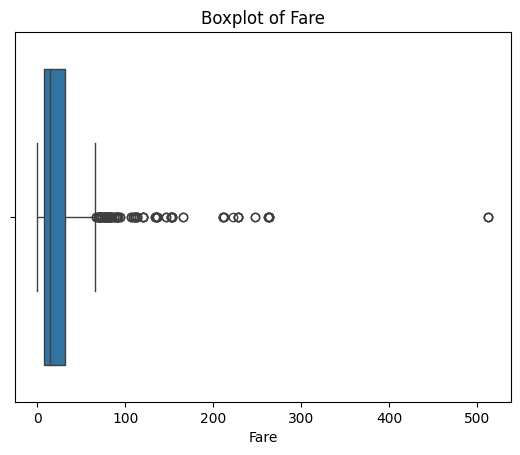

In [128]:
sns.boxplot(x='Fare',data=df)
plt.title('Boxplot of Fare')
plt.xlabel('Fare')

In [129]:
print("People with fare in between $200 and $300",df[(df['Fare']>200) & (df['Fare']<300)].shape[0])
print("People with fare in greater than $300",df[df['Fare']>300].shape[0])

People with fare in between $200 and $300 17
People with fare in greater than $300 3


### Conclusion
- Highly skewed data , a lot of people had cheaper tickets
- Outliers are there in the data

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


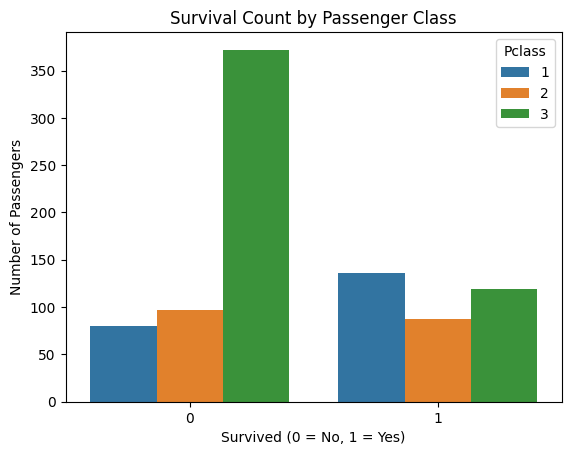

In [130]:
# Multivariate Analysis

# Survival with Pclass

sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Number of Passengers')

pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis=1)

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


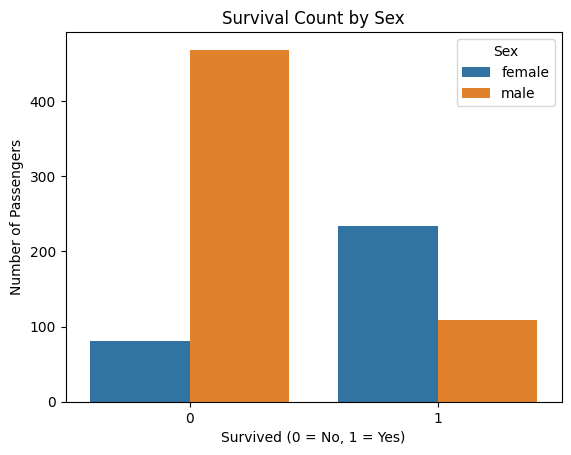

In [131]:
# Survival with sex

sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Sex')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Number of Passengers')


pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis=1)

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


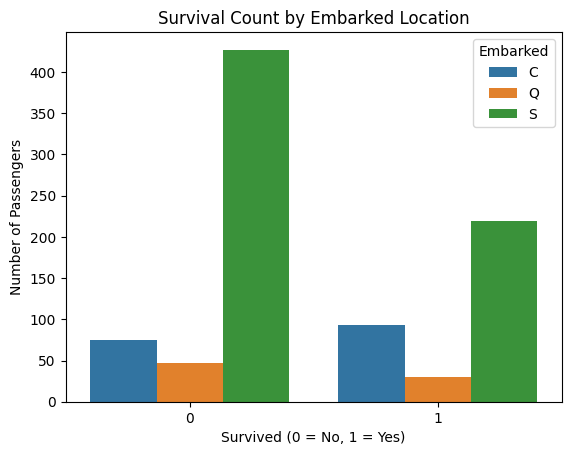

In [132]:
# Survival with Embarked

sns.countplot(x='Survived', hue='Embarked', data=df)
plt.title('Survival Count by Embarked Location')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Number of Passengers')


pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis=1)

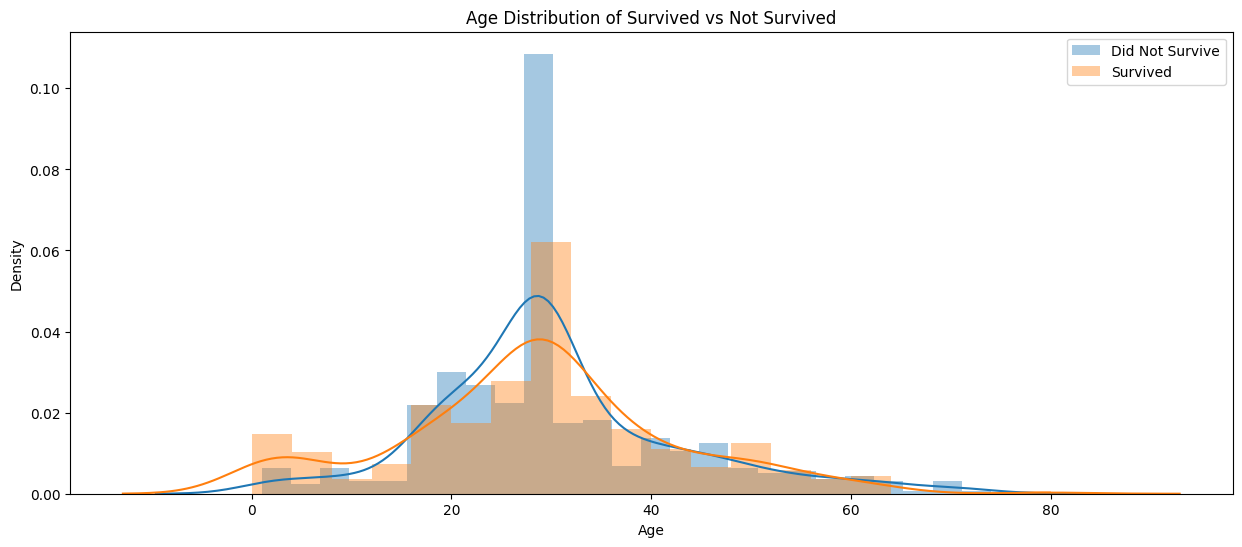

In [133]:
# Survived with Age

plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Age'],label='Did Not Survive')
sns.distplot(df[df['Survived']==1]['Age'],label='Survived')

plt.title('Age Distribution of Survived vs Not Survived')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

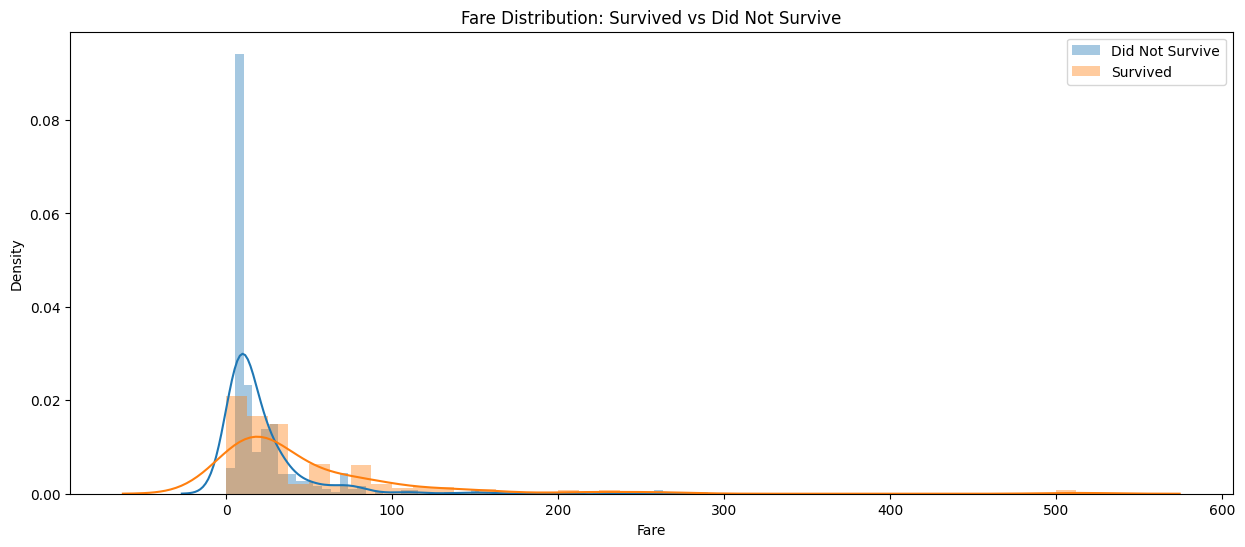

In [134]:
# Survived with Fare

plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Fare'],label='Did Not Survive')
sns.distplot(df[df['Survived']==1]['Fare'],label='Survived')

plt.title('Fare Distribution: Survived vs Did Not Survive')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend()

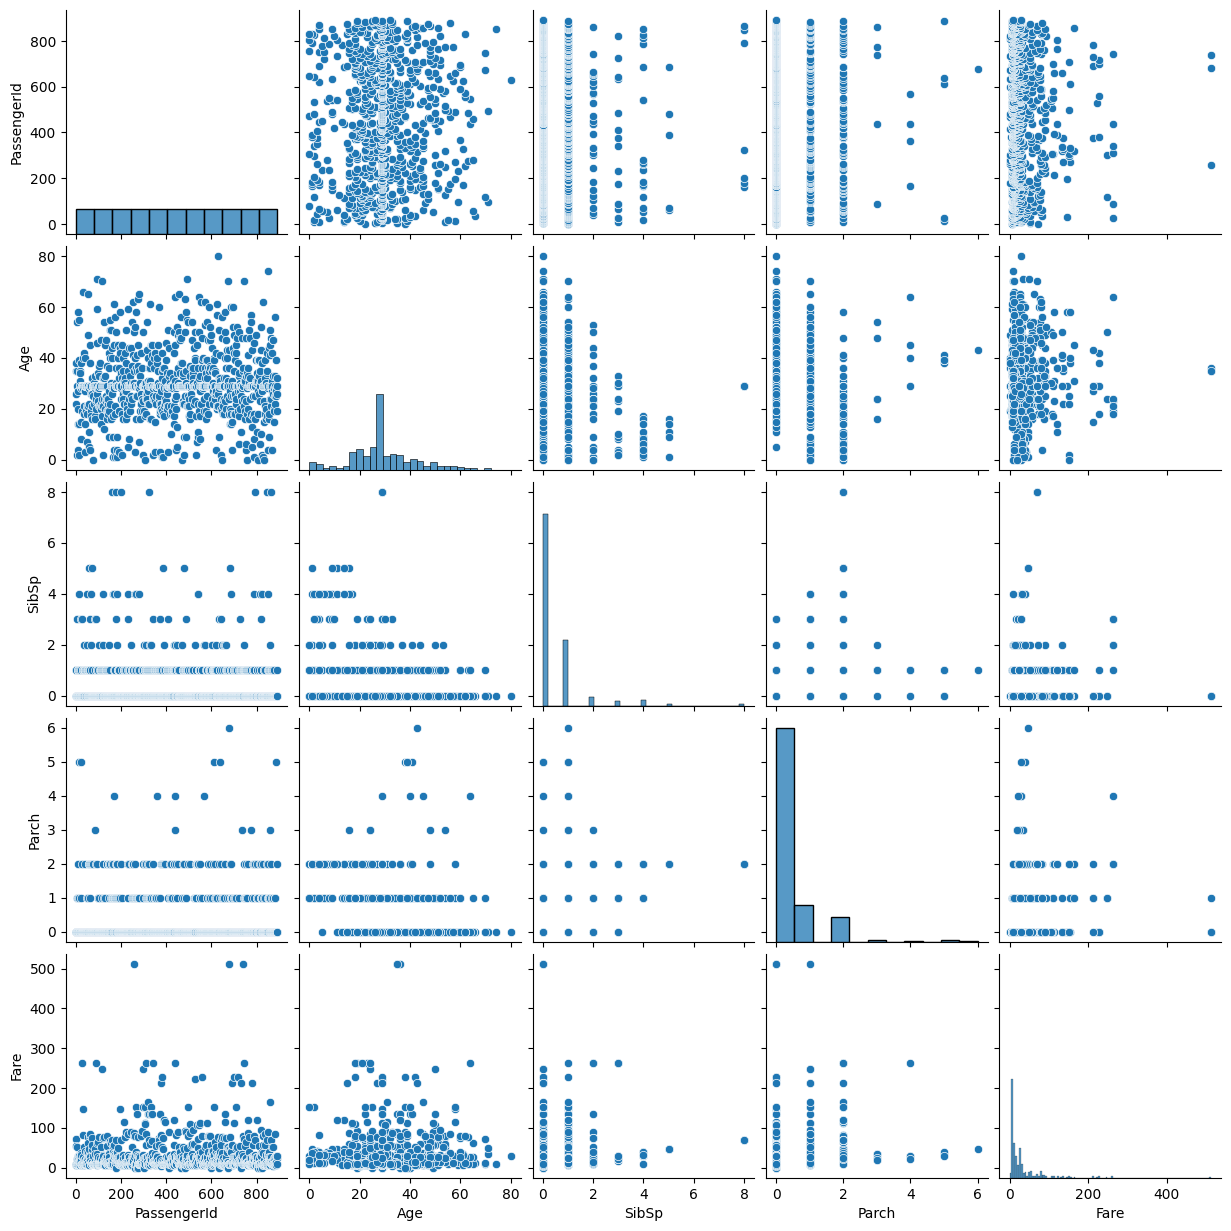

In [135]:
sns.pairplot(df)

<Axes: >

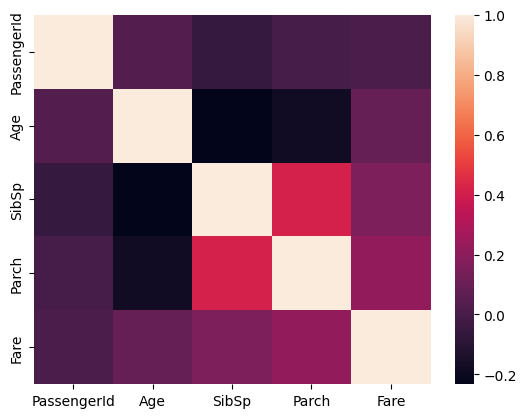

In [137]:
#sns.heatmap(df.corr())

numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Now create the heatmap
sns.heatmap(numeric_df.corr())

In [138]:
# Feature Engineering

# We will create a new column by the name of family which will be the sum of SibSp and Parch cols

df['family_size']=df['Parch'] + df['SibSp']

In [139]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
117,118,0,2,"Turpin, Mr. William John Robert",male,29,1,0,11668,21.0000,S,1
723,724,0,2,"Hodges, Mr. Henry Price",male,50,0,0,250643,13.0000,S,0
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15,0,0,330923,8.0292,Q,0
456,457,0,1,"Millet, Mr. Francis Davis",male,65,0,0,13509,26.5500,S,0
471,472,0,3,"Cacic, Mr. Luka",male,38,0,0,315089,8.6625,S,0


In [140]:
# Now we will enginner a new feature by the name of family type

def family_type(number):
    if number==0:
        return "Alone"
    elif number>0 and number<=4:
        return "Medium"
    else:
        return "Large"

In [141]:
df['family_type']=df['family_size'].apply(family_type)

In [142]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
777,778,1,3,"Emanuel, Miss. Virginia Ethel",female,5,0,0,364516,12.4750,S,0,Alone
533,534,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,29,0,2,2668,22.3583,C,2,Medium
575,576,0,3,"Patchett, Mr. George",male,19,0,0,358585,14.5000,S,0,Alone
50,51,0,3,"Panula, Master. Juha Niilo",male,7,4,1,3101295,39.6875,S,5,Large
851,852,0,3,"Svensson, Mr. Johan",male,74,0,0,347060,7.7750,S,0,Alone


In [143]:
# Dropping SibSp, Parch and family_size

df.drop(columns=['SibSp','Parch','family_size'],inplace=True)

In [144]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
522,523,0,3,"Lahoud, Mr. Sarkis",male,29,2624,7.2250,C,Alone
410,411,0,3,"Sdycoff, Mr. Todor",male,29,349222,7.8958,S,Alone
159,160,0,3,"Sage, Master. Thomas Henry",male,29,CA. 2343,69.5500,S,Large
676,677,0,3,"Sawyer, Mr. Frederick Charles",male,24,342826,8.0500,S,Alone
113,114,0,3,"Jussila, Miss. Katriina",female,20,4136,9.8250,S,Medium


In [145]:
pd.crosstab(df['family_type'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


## Detecting outliers

### Numerical Data
- if the data is following normal distribution, anything beyond 3SD - mean + 3SD can be considered as an outlier
- if the data does not follow normal distribution, using boxplot we can eliminate points beyond Q1 - 1.5 * IQR and Q3 + 1.5 * IQR

### Categorical data
- If the col is highly imbalnced for eg male 10000 and female 2 then we can eliminate female

In [146]:
# handling outliers in age(Almost normal)

df=df[df['Age']<(df['Age'].mean() + 3 * df['Age'].std())]
df.shape

(884, 10)

In [147]:
# handling outliers from Fare column

# Finding quartiles

Q1= np.percentile(df['Fare'],25)
Q3= np.percentile(df['Fare'],75)

outlier_low=Q1 - 1.5 * (Q3 - Q1)
outlier_high=Q3 + 1.5 * (Q3 - Q1)

df=df[(df['Fare']>outlier_low) & (df['Fare']<outlier_high)]

In [148]:
# One hot encoding

df.sample(4)

# Cols to be transformed are Pclass, Sex, Embarked, family_type

pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','family_type'], drop_first=True)

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,1,0,"Braund, Mr. Owen Harris",22,A/5 21171,7.2500,False,True,True,False,True,False,True
2,3,1,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7.9250,False,True,False,False,True,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,113803,53.1000,False,False,False,False,True,False,True
4,5,0,"Allen, Mr. William Henry",35,373450,8.0500,False,True,True,False,True,False,False
5,6,0,"Moran, Mr. James",29,330877,8.4583,False,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27,211536,13.0000,True,False,True,False,True,False,False
887,888,1,"Graham, Miss. Margaret Edith",19,112053,30.0000,False,False,False,False,True,False,False
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29,W./C. 6607,23.4500,False,True,False,False,True,False,True
889,890,1,"Behr, Mr. Karl Howell",26,111369,30.0000,False,False,True,False,False,False,False


In [149]:
df=pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','family_type'], drop_first=True)

<Axes: >

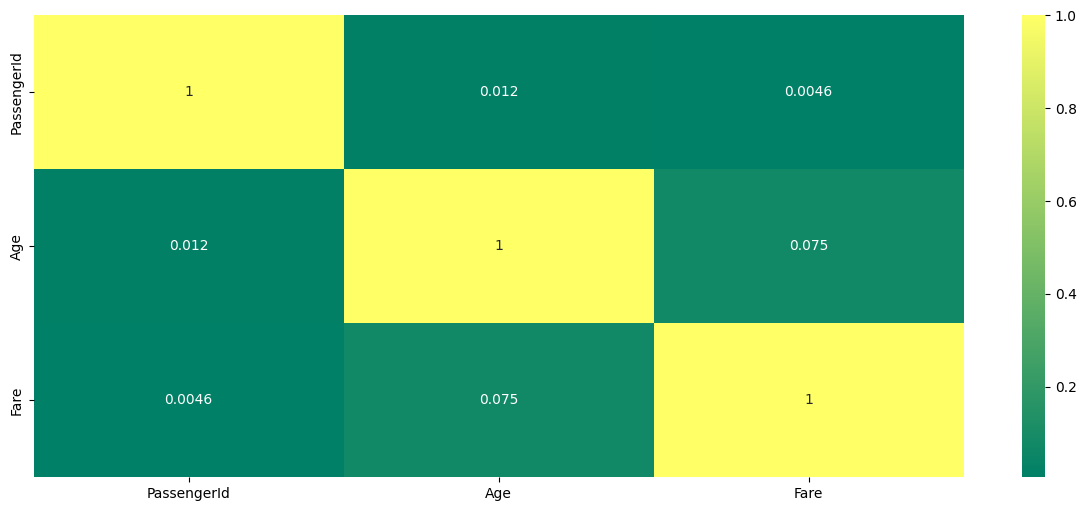

In [152]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot the heatmap
plt.figure(figsize=(15,6))
sns.heatmap(numeric_df.corr(), cmap='summer', annot=True)

#sns.heatmap(df.corr(), cmap='summer')

### Drawing Conclusions
- Chance of female survival is higher than male survival
- Travelling in Pclass 3 was deadliest
- Somehow, people going to C survived more
- People in the age range of 20 to 40 had a higher chance of not surviving
- People travelling with smaller familes had a higher chance of surviving the accident in comparison to people with large families and travelling alone

In [153]:
def extract(x):
    temp = x.split(" ")
    if "Mr." in temp:
        return "Mr"
    elif "Mrs." in temp:
        return "Mrs"
    elif "Miss." in temp:
        return "Miss"
    elif "Master." in temp:
        return "Master"
    elif "Dr." in temp:
        return "Dr"
    else:
        return None

In [154]:
df["Category"] = df["Name"].apply(extract)

In [157]:
df.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium,Category
0,1,0,"Braund, Mr. Owen Harris",22,A/5 21171,7.2500,False,True,True,False,True,False,True,Mr
2,3,1,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7.9250,False,True,False,False,True,False,False,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,113803,53.1000,False,False,False,False,True,False,True,Mrs
4,5,0,"Allen, Mr. William Henry",35,373450,8.0500,False,True,True,False,True,False,False,Mr
5,6,0,"Moran, Mr. James",29,330877,8.4583,False,True,True,True,False,False,False,Mr


In [91]:
df["Category"].unique()

array(['Mr', 'Miss', 'Mrs', 'Master', None, 'Dr'], dtype=object)

In [93]:
print("Mr." , np.mean(df[df["Category"] == "Mr"]["Age"]))
print("Mrs." , np.mean(df[df["Category"] == "Mrs"]["Age"]))
print("Miss." , np.mean(df[df["Category"] == "Miss"]["Age"]))
print("Master." , np.mean(df[df["Category"] == "Master"]["Age"]))
print("Dr." , np.mean(df[df["Category"] == "Dr"]["Age"]))

Mr. 30.834745762711865
Mrs. 33.855670103092784
Miss. 21.23076923076923
Master. 6.472222222222222
Dr. 37.4


In [ ]:
# This should be a better approach to fill the missing values of Age column